## Vorlesung LE05

## Aufsetzen der Umgebung

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
#print('numpy',np.__version__)

In [68]:
#import matplotlib
#print('matplotlib',matplotlib.__version__)

In [70]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):
    # Marker und Farben
    markers = ('s', 'v', 'o', '𝝠', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Darstellung der Entscheidungsmatrix
    ## Minima und Maxima des Plotranges entlang der zwei Dimensionen
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    ## Punktraster über diesen Bereich mit definierter Auflösung legen 
    ## siehe auch https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    ## Klassifikation bestimmen
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    ##Klassifikation zeichnen (alpha ist so etwas wie Sättigung der Farbe)
    plt.contourf(xx1, xx2,Z,alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #Darstellen aller Datensätze
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y==cl, 0], y=X[ y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    

### Übung 1

**Den Malware-Datensatz laden**

Lesen sie den Datensatz memproc.csv in einen Dataframe

In [75]:
df1 = pd.read_csv("memproc.csv")
print(df1.to_string())

           host      proc       mem     state
0    crisnd6378 -1.735788 -0.722979    Normal
1    crisnd5885 -0.568770 -1.934926    Normal
2    crisnd4508 -1.102691 -2.629311    Normal
3    crisnd6376 -2.010346 -1.778285    Normal
4    crisnd1301 -0.683525 -0.396034    Normal
5    crisnd7419  0.351669  3.218415  Infected
6    crisnd0357 -1.057801 -2.199631    Normal
7    crisnd2342  1.896578 -1.901249    Normal
8    crisnd0241 -2.294327  0.354716    Normal
9    crisnd9665 -2.156447  0.465791    Normal
10   crisnd5669 -2.247110 -1.235257    Normal
11   crisnd0426 -0.532614  0.631420    Normal
12   crisnd7183  0.948436  0.049716    Normal
13   crisnd2969 -1.873865 -1.038698    Normal
14   crisnd0194 -0.802533 -1.308481    Normal
15   crisnd9368 -1.290675 -0.437498    Normal
16   crisnd7336  0.470141 -0.546420    Normal
17   crisnd8975 -0.651143 -2.132100    Normal
18   crisnd0062 -0.351499 -0.441091    Normal
19   crisnd9002 -1.018804 -0.345687    Normal
20   crisnd7611 -0.227872  0.96509

Welche Eigenschaften hat der Datensatz, u.a. Größe, Merkmale, Label?

In [78]:
print("Größe des Datensatzes: ", df1.shape)

Größe des Datensatzes:  (247, 4)


In [80]:
print("Datenübersicht:")
print(df1.info())

Datenübersicht:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   host    247 non-null    object 
 1   proc    247 non-null    float64
 2   mem     247 non-null    float64
 3   state   247 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB
None


In [82]:
print("Statistische Zusammenfassung:")
print(df1.describe())

Statistische Zusammenfassung:
             proc         mem
count  247.000000  247.000000
mean    -0.428731   -0.518138
std      1.228676    1.311917
min     -3.151675   -3.593867
25%     -1.205594   -1.420167
50%     -0.448406   -0.621155
75%      0.368877    0.241259
max      3.142826    3.218415


Wieviel Beobachtungen gibt es je Klasse? 

In [85]:
klasse_counts = df1['state'].value_counts()
print(klasse_counts)

state
Normal      194
Infected     53
Name: count, dtype: int64


Was muss möglicherweise getan werden, um die Daten für das maschinelle Lernen zu verwenden?

In [87]:
print(df1.isnull().sum())
df1 = df1.dropna()

host     0
proc     0
mem      0
state    0
dtype: int64


Zeichnen Sie die Daten so in ein Streudiagramm, dass die Klassen unterschieden werden können

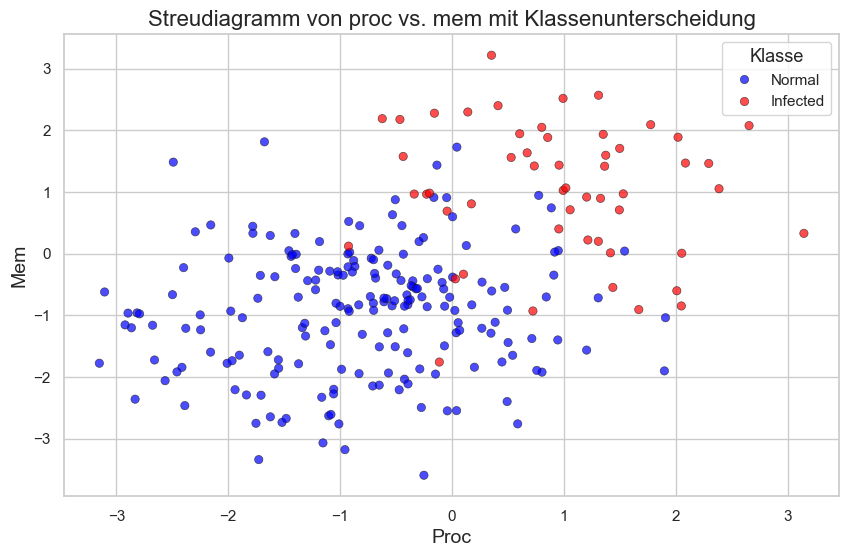

In [56]:
# Setzen des Seaborn-Stils für bessere Ästhetik
sns.set(style="whitegrid")

# Erstellen des Streudiagramms
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=df1,
    x='proc',
    y='mem',
    hue='state', #Teilt die Datenpunkte basierend auf den Werten in der State-Spalte           
    palette={'Normal': 'blue', 'Infected': 'red'},
    alpha=0.7,             # Transparenz der Punkte
    edgecolor='k'          # Schwarzer Rand für bessere Sichtbarkeit
)

# Hinzufügen von Titeln und Labels
plt.title('Streudiagramm von proc vs. mem mit Klassenunterscheidung', fontsize=16)
plt.xlabel('Proc', fontsize=14)
plt.ylabel('Mem', fontsize=14)

# Anpassen der Legende
plt.legend(title='Klasse', title_fontsize='13', fontsize='11')

# Anzeigen des Diagramms
plt.show()


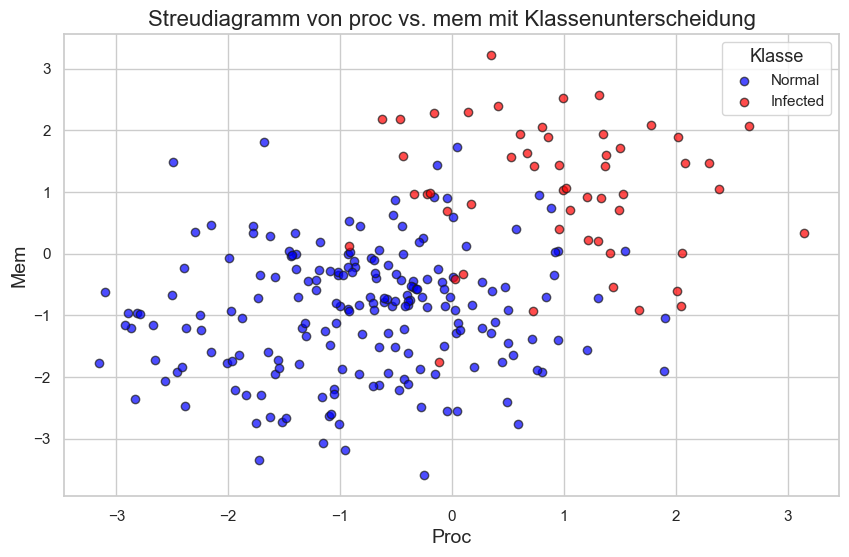

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Erstellen des Streudiagramms mit Matplotlib
plt.figure(figsize=(10, 6))

# Filtern der Daten nach Klassen
normal = df1[df1['state'] == 'Normal']
infected = df1[df1['state'] == 'Infected']

# Plotten der Normal-Klasse
plt.scatter(normal['proc'], normal['mem'], 
            color='blue', label='Normal', alpha=0.7, edgecolors='k')

# Plotten der Infected-Klasse
plt.scatter(infected['proc'], infected['mem'], 
            color='red', label='Infected', alpha=0.7, edgecolors='k')

# Hinzufügen von Titeln und Labels
plt.title('Streudiagramm von proc vs. mem mit Klassenunterscheidung', fontsize=16)
plt.xlabel('Proc', fontsize=14)
plt.ylabel('Mem', fontsize=14)

# Hinzufügen der Legende
plt.legend(title='Klasse', fontsize='11', title_fontsize='13')

# Anzeigen des Diagramms
plt.grid(True)
plt.show()


#### Übung 1 Ende

**Den Iris Datensatz aus scikit-learn laden**

Scikit learn bringt den Iris Datensatz schon mit

In [11]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Die Blumennamen sind schon in numerische Labels umgesetzt!

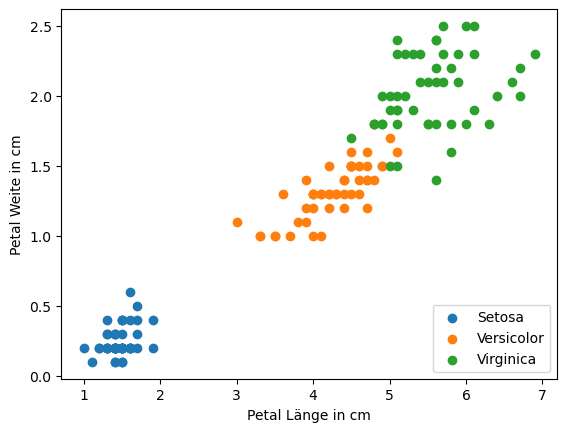

In [13]:
plt.scatter(X[:50,0], X[:50,1], label='Setosa')
plt.scatter(X[50:100,0], X[50:100,1], label='Versicolor')
plt.scatter(X[100:150,0], X[100:150,1], label='Virginica')
plt.xlabel("Petal Länge in cm") # x label 
plt.ylabel("Petal Weite in cm") # y label
plt.legend(loc='lower right')

In [15]:
X_sm=X[50:150]
y_sm=y[50:150]
print('Class labels:', np.unique(y_sm))

Class labels: [1 2]


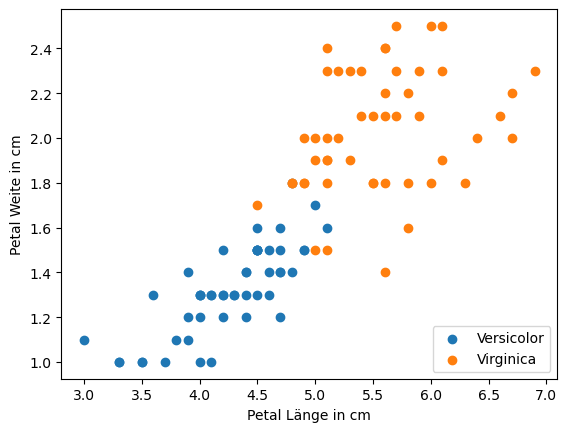

In [17]:
plt.scatter(X_sm[:50,0], X_sm[:50,1], label='Versicolor')
plt.scatter(X_sm[50:100,0], X_sm[50:100,1], label='Virginica')
plt.xlabel("Petal Länge in cm") # x label 
plt.ylabel("Petal Weite in cm") # y label
plt.legend(loc='lower right')

**Aufsplitten der Iris-Daten in Train (70%) und Test (30%)**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=1, stratify=y_sm)

In [21]:
print('Anzahl Labels  in y_sm:', np.bincount(y_sm))
print('Anzahl Labels in y_train:', np.bincount(y_train))
print('Anzahl Labels in y_test:', np.bincount(y_test))

Anzahl Labels  in y_sm: [ 0 50 50]
Anzahl Labels in y_train: [ 0 35 35]
Anzahl Labels in y_test: [ 0 15 15]


**Iris mit scikit Standardscaler normieren**


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Einfaches lineares Modell (Perzeptron) aus trainieren

In [25]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [27]:
y_pred = ppn.predict(X_test_std)
print('Falsch klassifiziert: %d' % (y_test != y_pred).sum())

Falsch klassifiziert: 1


Konfusionsmatrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[15,  0],
       [ 1, 14]], dtype=int64)

Kann normiert werden (y_test, y_pred oder all)

In [37]:
confusion_matrix(y_test,y_pred,normalize='all')


array([[0.5       , 0.        ],
       [0.03333333, 0.46666667]])

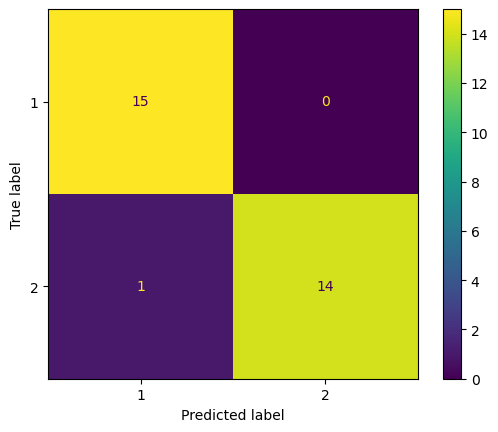

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

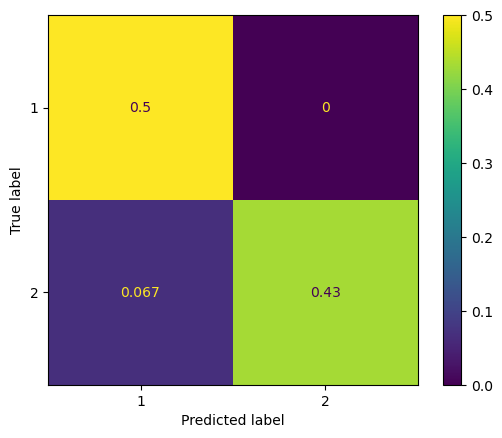

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.967


In [31]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.967


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



ACHTUNG - neue Version im Vergleich zu oben, die die Testdaten mit zeichnet

In [43]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, test_idx=None,resolution=0.02):
    # Marker und Farben
    markers = ('s', 'v', 'o', '𝝠', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Darstellung der Entscheidungsmatrix
    ## Minima und Maxima des Plotranges entlang der zwei Dimensionen
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    ## Punktraster über diesen Bereich mit definierter Auflösung legen 
    ## siehe auch https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    ## Klassifikation bestimmen
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    ##Klassifikation zeichnen (alpha ist so etwas wie Sättigung der Farbe)
    plt.contourf(xx1, xx2,Z,alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #Darstellen aller Datensätze
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y==cl, 0], y=X[ y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    color='None',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
    

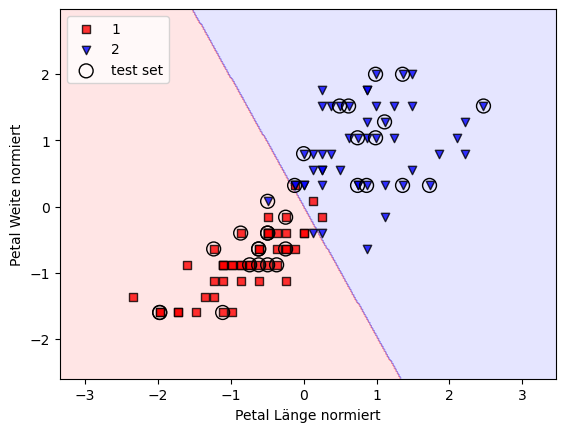

In [45]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(70, 100))
plt.xlabel('Petal Länge normiert')
plt.ylabel('Petal Weite normiert')
plt.legend(loc='upper left')

plt.show()

### Übung 2

Schaffen Sie numpy arrays für die Merkmale und die Labels

Spelitten Sie die Daten in  in Train (70%) und Test (30%), Parameter randeom_state=1, stratify=y

In [190]:
from sklearn.linear_model import Perceptron

ppn2 = Perceptron(eta0=0.1, random_state=1)
ppn2.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=1)

Stellen Sie fest, weiviel Beobachungen falsch klassifiziert und stellen Sie eine Konfusionsmatrix auf; was fällt Ihnen dabei auf?

In [212]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, test_idx=None,resolution=0.02):
    # Marker und Farben
    markers = ('s', 'v', 'o', '𝝠', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Darstellung der Entscheidungsmatrix
    ## Minima und Maxima des Plotranges entlang der zwei Dimensionen
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    ## Punktraster über diesen Bereich mit definierter Auflösung legen 
    ## siehe auch https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    ## Klassifikation bestimmen
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    ##Klassifikation zeichnen (alpha ist so etwas wie Sättigung der Farbe)
    plt.contourf(xx1, xx2,Z,alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #Darstellen aller Datensätze
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y==cl, 0], y=X[ y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    color='None',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
    

Zeichnen Sie die Dafen mit der Funktion plot_decision_regions, so dass die Lage der Testdaent zu erkennen ist